Course Name: Machine Learning

Course Code: 2CS501


Yagnik Thummar (19BCE282)

Dhara Vaghela (19BCE289)




The original stated problem is estimate the age an abalone, which can be determined from the number of rings in their shell. 
However, counting the number of rings in an abalone shell is an expensive method. Thus, one possible solution is predict the number of rings of an abalone from characteristics like height, diameter, lenght and weight measurements.

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import*
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestRegressor

import Datasets

In [2]:
url='https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
head=["sex","length","diameter","height","whole_weight","shucked_weight","viscera_weight","shell_weight","rings"]
data=pd.read_csv(url,names=head)
data.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
print("Head Five Row")
print(data.head())
print("__________________________________________________________________________________")
print(data.describe())
print("__________________________________________________________________________________")
print(data.nunique())
print("__________________________________________________________________________________")
print(data.info())

Head Five Row
  sex  length  diameter  height  whole_weight  shucked_weight  viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   shell_weight  rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  
__________________________________________________________________________________
            length     diameter       height  whole_weight  shucked_weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240 

In [4]:
print(data.dtypes)

sex                object
length            float64
diameter          float64
height            float64
whole_weight      float64
shucked_weight    float64
viscera_weight    float64
shell_weight      float64
rings               int64
dtype: object


In [5]:
missing_values = data.isnull().sum().sort_values(ascending = False)
print(missing_values)

sex               0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
dtype: int64


In [6]:
# In this study, each one of these attributes were analyzed, as well as the relationships between them.

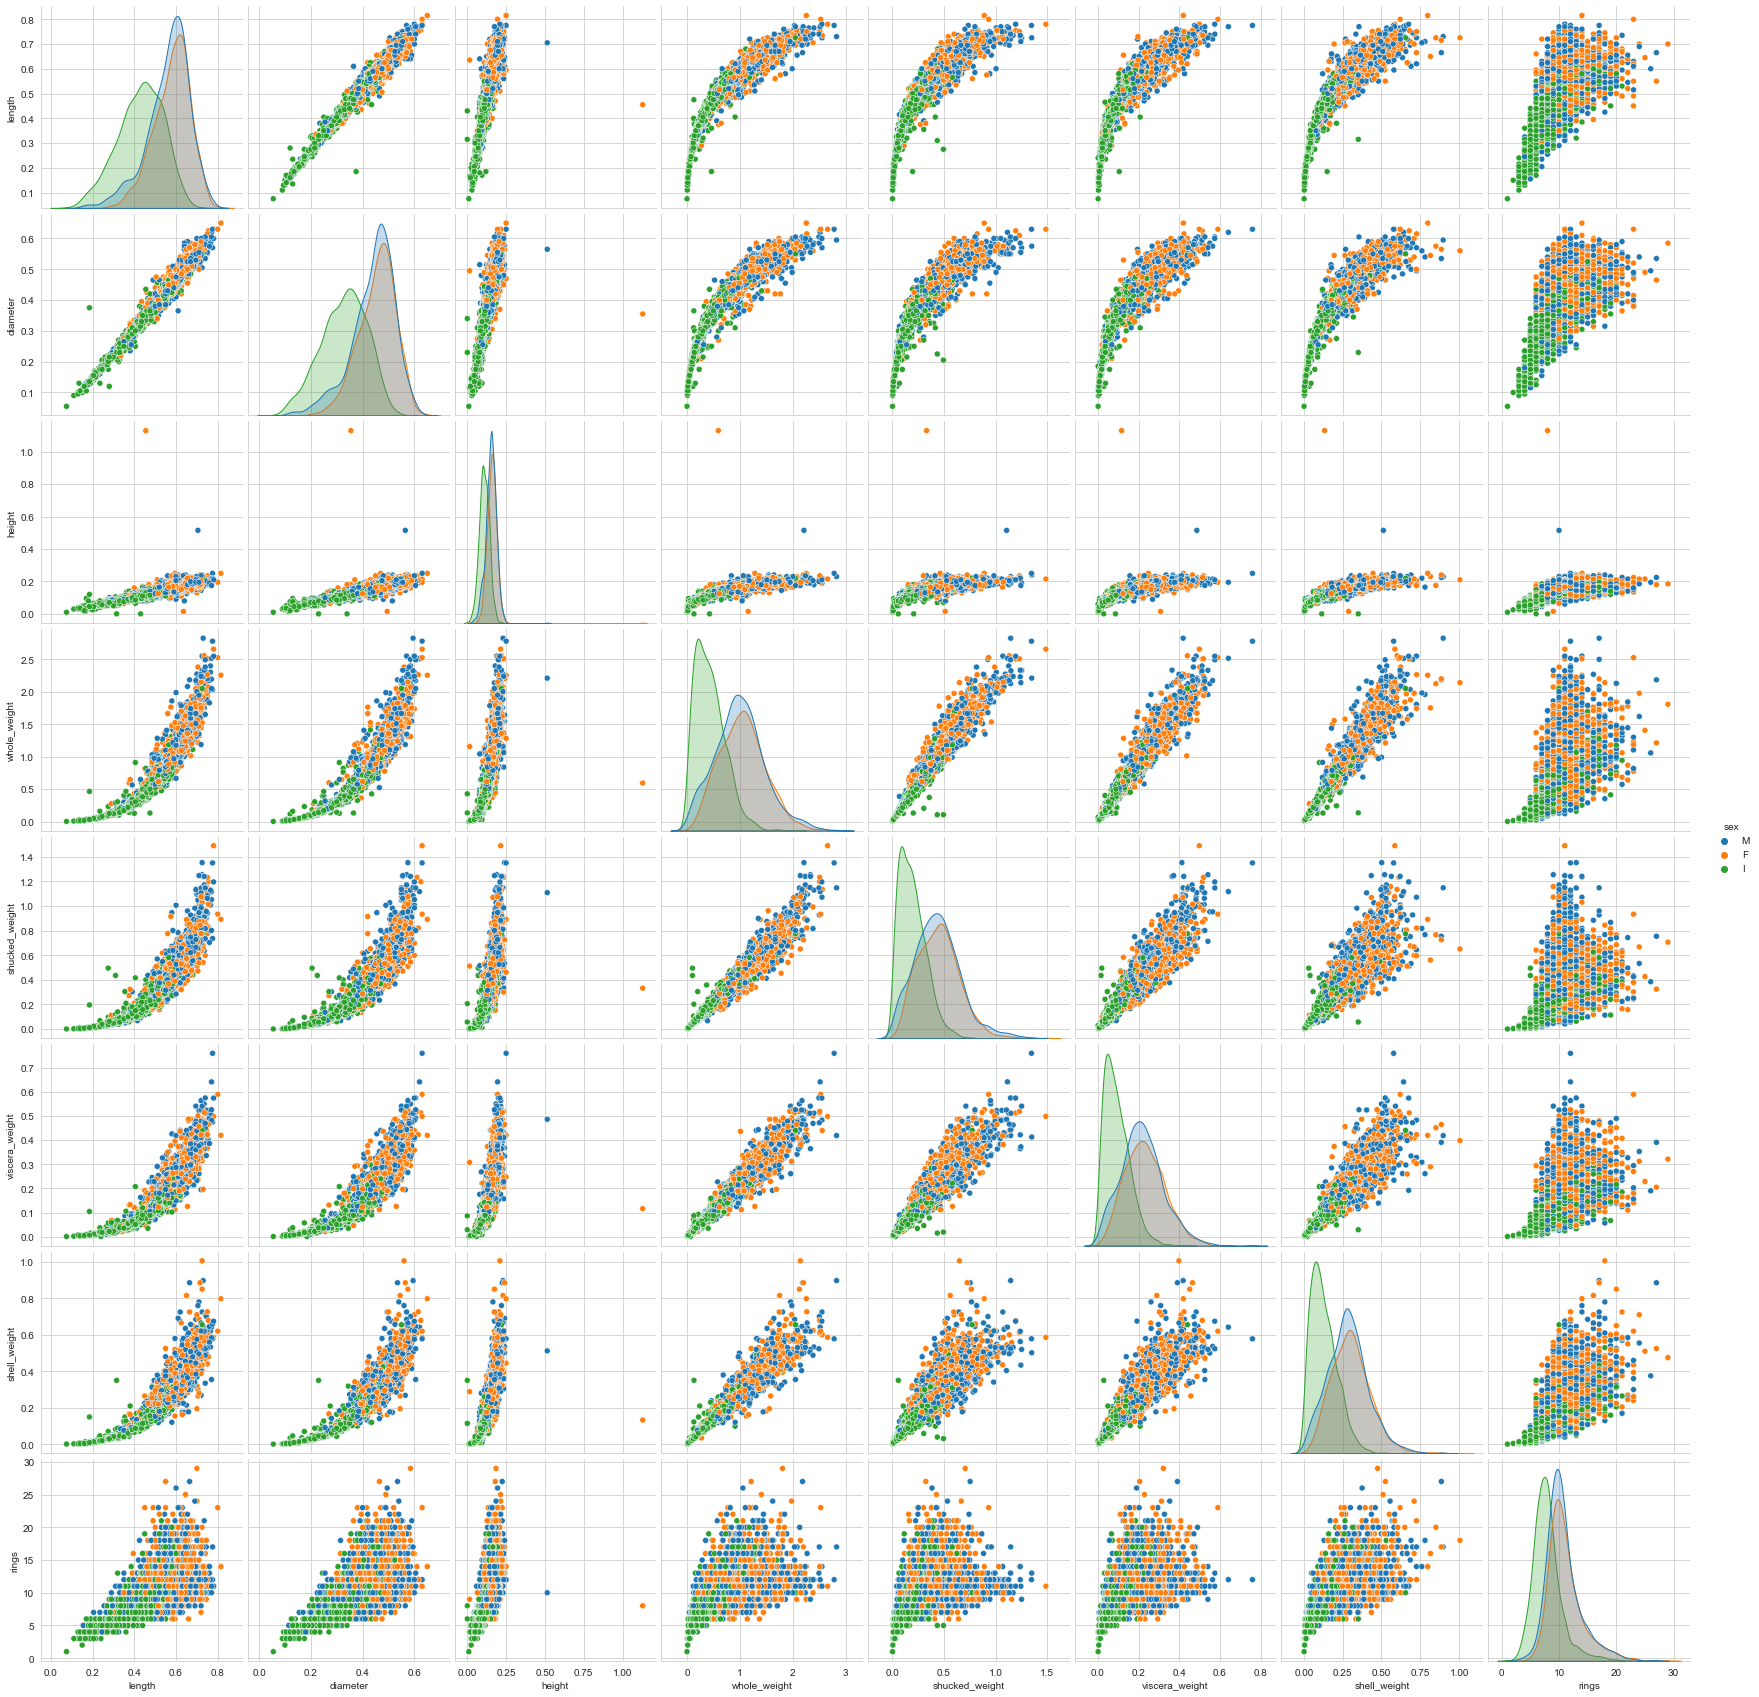

In [7]:
sns.set_style('whitegrid')
sns.pairplot(data,hue='sex',height=3)
plt.show()

C:\Users\yagni\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

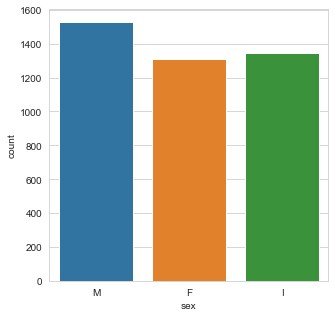

In [8]:
plt.figure(figsize=(5,5))
sns.countplot(data.sex)

<AxesSubplot:>

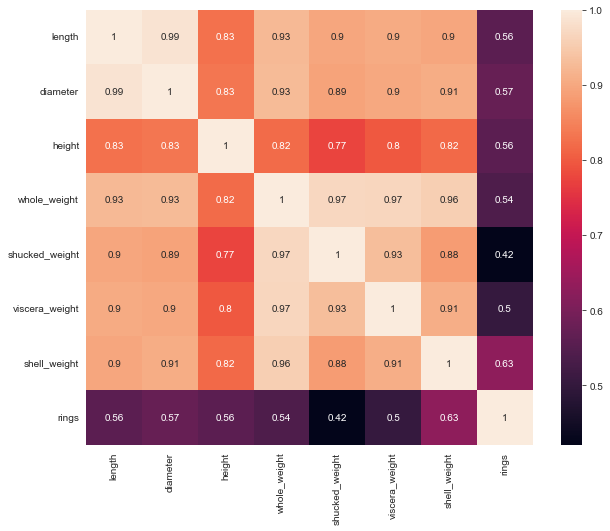

In [9]:
plt.figure(figsize = (10,8))
sns.heatmap(data.corr(), annot = True)

In [10]:
# Influence of sex on attributes

<AxesSubplot:xlabel='sex', ylabel='rings'>

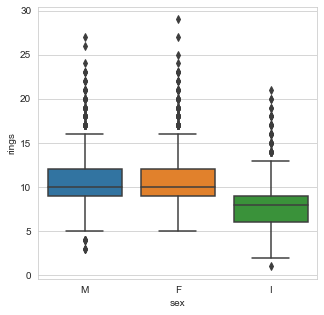

In [11]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=data, x='sex', y='rings')

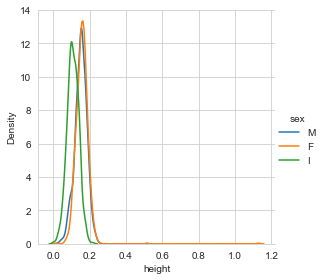

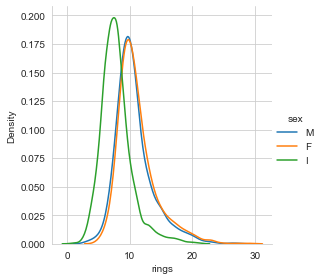

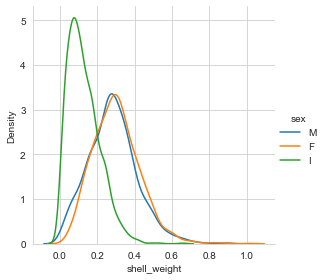

In [12]:
sns.FacetGrid(data,hue='sex',height=4).map(sns.kdeplot,'height').add_legend()
plt.show()
sns.FacetGrid(data,hue='sex',height=4).map(sns.kdeplot,'rings').add_legend()
plt.show()
sns.FacetGrid(data,hue='sex',height=4).map(sns.kdeplot,'shell_weight').add_legend()
plt.show()

In [13]:
pd.get_dummies(data['sex'])

,F,I,M
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
...,...,...,...
4172,1,0,0
4173,0,0,1
4174,0,0,1
4175,1,0,0


In [14]:
# Now we Try to Predict all Parameter by Regression Model..

# Regression

In [15]:
# preprocessing+training

def Regression(df,target,task):
    df=df.copy()
    dummies=pd.get_dummies(df['sex'])
    df=pd.concat([df,dummies],axis=1)
    df=df.drop('sex',axis=1)
        
    #split data
    y=df[target].copy()
    x=df.drop(target,axis=1).copy()

    # train test split
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=1)
    
    # scale data similer value of data / mean is close to 1 && / var is close to 0
    scaler=StandardScaler()
    scaler.fit(x_train)
    x_train=pd.DataFrame(scaler.transform(x_train),columns=x.columns)
    x_test=pd.DataFrame(scaler.transform(x_test),columns=x.columns)
    
    # define model
    if task=='regression':
        model=LinearRegression()
    elif task=='classification':
        model=LogisticRegression()
    
    # fit model
    model.fit(x_train,y_train)
    
    #test
    return model.score(x_test,y_test)

In [16]:
print("Predict Length From Parameter by Regression:",end=" ")
print(Regression(data,'length','regression'))
print("Predict Diameter From Parameter by Regression:",end=" ")
print(Regression(data,'diameter','regression'))
print("Predict Height From Parameter by Regression:",end=" ")
print(Regression(data,'height','regression'))
print("Predict Whole_weight From Parameter by Regression:",end=" ")
print(Regression(data,'whole_weight','regression'))
print("Predict shucked_weight From Parameter by Regression:",end=" ")
print(Regression(data,'shucked_weight','regression'))
print("Predict viscera_weight From Parameter by Regression:",end=" ")
print(Regression(data,'viscera_weight','regression'))
print("Predict shell_weight From Parameter by Regression:",end=" ")
print(Regression(data,'shell_weight','regression'))
print("Predict rings From Parameter by Regression:",end=" ")
print(Regression(data,'rings','regression'))
print("\nNow we Go thorugh Classification for rings:-")
print("Predict Length From Parameter by classification:",end=" ")
print(Regression(data,'rings','classification')*100)

Predict Length From Parameter by Regression: 0.975280701115525
Predict Diameter From Parameter by Regression: 0.9757774018494402
Predict Height From Parameter by Regression: 0.8147128494326028
Predict Whole_weight From Parameter by Regression: 0.9907939862724241
Predict shucked_weight From Parameter by Regression: 0.967560623799818
Predict viscera_weight From Parameter by Regression: 0.9462029768958086
Predict shell_weight From Parameter by Regression: 0.9511021251454075
Predict rings From Parameter by Regression: 0.5196233420241054

Now we Go thorugh Classification for rings:-
Predict Length From Parameter by classification: 25.9170653907496


C:\Users\yagni\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
#  for ring classification Regression we cant achive good prediction result..

# by LogisticRegression

Class Counts
M    469
F    394
I    391
Name: sex, dtype: int64

Class Proportions
M    0.374003
F    0.314195
I    0.311802
Name: sex, dtype: float64


<AxesSubplot:>

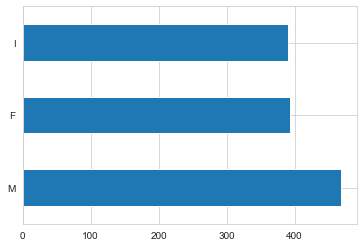

In [18]:
df1=data.copy()
y=df1['sex'].copy()
x=df1.drop('sex',axis=1).copy()
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=1)
print("Class Counts")
print(y_test.value_counts(),end="\n\n")
print("Class Proportions")
print(y_test.value_counts()/len(y_test))
y_test.value_counts().plot(kind='barh')


Test accuracy of (Logistic regression ) =  56.61881977671451
Model accuracy of This model(cross verification ): = 55.38829969209716


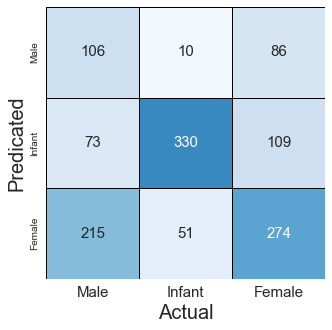

In [19]:
Log=LogisticRegression(solver='liblinear',fit_intercept=True)
Log.fit(x_train,y_train)
Log_pred=Log.predict(x_test)
print("Test accuracy of (Logistic regression ) = ",Log.score(x_test,y_test)*100)
print("Model accuracy of This model(cross verification ): =",Log.score(x_train,y_train)*100)
#generate confusion matrix
cm=confusion_matrix(y_test,Log_pred)
cm_df=pd.DataFrame(cm)

fig,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm_df.T,annot=True,annot_kws={'size':15},cmap='Blues',vmin=0,vmax=500,fmt='.0f',linewidths=1,linecolor='black',cbar=False,xticklabels=['Male','Infant','Female'],yticklabels=['Male','Infant','Female'])
plt.ylabel("Predicated",fontsize=20)
plt.xlabel("Actual",fontsize=20)
ax.set_xticklabels(['Male','Infant','Female'],fontsize=15)
ax.set_xticklabels(['Male','Infant','Female'],fontsize=15)
plt.show()

In [20]:
# we get almost 74% to 76% accuracy On Logistic Regression

In [21]:

############ Predict Age by Rings ##################


<AxesSubplot:>

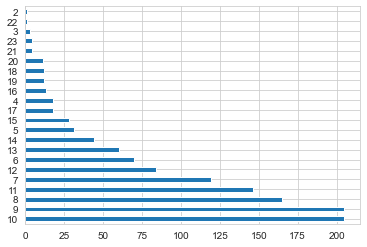

In [22]:
df1=data.copy()
y=df1['rings'].copy()
x=df1.drop('rings',axis=1).copy()
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=1)
# print("Class Counts")
# print(y_test.value_counts(),end="\n\n")
# print("Class Proportions")
# print(y_test.value_counts()/len(y_test))
y_test.value_counts().plot(kind='barh')

In [23]:
# There are no equal distribution of Rings_size That's why we got less Accuracy

In [24]:
def rings_label(x):
    if x<=10:
        return 1
    if x<=20:
        return 2
    if x<=30:
        return 3
#  we use to represent 1 as a young age 2 as a middle age and 3 as a old age abalone
df1=data.copy()
df1['rings'] = df1['rings'].apply(rings_label)

In [25]:
df1.head()

# df1.nunique()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,2
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,1
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,1


1    2730
2    1411
3      36
Name: rings, dtype: int64


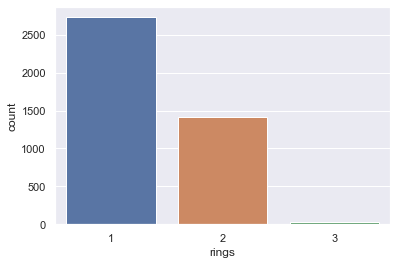

In [26]:
print(df1.rings.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="rings", data=df1)

In [27]:
# Now we try Diffrent Model for Prediction

In [28]:
df1

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,2
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,1
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,1
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,1
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,2
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,1
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,1
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1


In [29]:
dummies=pd.get_dummies(df1['sex'])
df1=pd.concat([df1,dummies],axis=1)
df1=df1.drop('sex',axis=1)

y=df1['rings'].copy()
x=df1.drop('rings',axis=1).copy()
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=1)

1. LinearRegression

In [30]:
def Linearreg():
    model = LinearRegression()
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    print("MAE(Mean absolute error): ",mean_absolute_error(y_true=y_test,y_pred=pred))  #Mean absolute error
    print("MSE(Mean squared error): ",mean_squared_error(y_true=y_test,y_pred=pred))   #Mean squared error
    r2_score = model.score(x_test,y_test)
    print("Regression score",r2_score*100,'%')
    
Linearreg()


MAE(Mean absolute error):  0.3260001588666268
MSE(Mean squared error):  0.1633941300177688
Regression score 32.9033572468215 %


2. Gaussian Naive bayes

Accuracy:
66.34768740031897 %



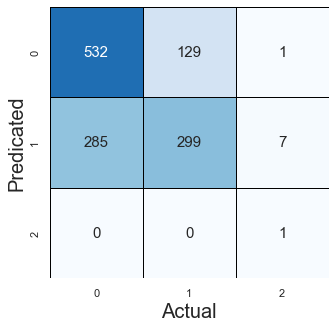

In [31]:
def gaussian():
    gaus=GaussianNB()
    gaus.fit(x_train,y_train)
    print("Accuracy:")
    print(accuracy_score(y_test,gaus.predict(x_test),normalize=True)*100,"%")
    print()
    pred=gaus.predict(x_test)
    cm=confusion_matrix(y_test,pred)
    cm_df=pd.DataFrame(cm)
    fig,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm_df.T,annot=True,annot_kws={'size':15},cmap='Blues',vmin=0,vmax=700,fmt='.0f',linewidths=1,linecolor='black',cbar=False)
    plt.ylabel("Predicated",fontsize=20)
    plt.xlabel("Actual",fontsize=20)
    plt.show()
    
gaussian()

3. Decision Tree Classifire

Student: (4177, 9) 
x_train: (2923, 10) 
X_test: (1254, 10) 
y_train: (2923,) 
y_test: (1254,)
Accuracy:  76.07655502392345 %


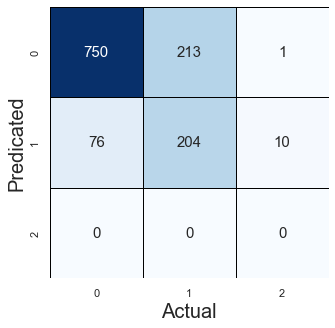

In [48]:
def dectree():
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)
    print("Student:",data.shape,"\nx_train:",x_train.shape, "\nX_test:",x_test.shape, "\ny_train:",y_train.shape , '\ny_test:',y_test.shape )   

    class_name=['1','2','3']
    grade_classifier = DecisionTreeClassifier(max_leaf_nodes=len(x.columns), random_state=0)
    grade_classifier.fit(x_train, y_train)    

    pred = grade_classifier.predict(x_test)

    print("Accuracy: ",(accuracy_score(y_test,pred))*100,"%")
    cm=confusion_matrix(y_test,pred)
    cm_df=pd.DataFrame(cm)
    fig,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm_df.T,annot=True,annot_kws={'size':15},cmap='Blues',vmin=0,vmax=700,fmt='.0f',linewidths=1,linecolor='black',cbar=False)
    plt.ylabel("Predicated",fontsize=20)
    plt.xlabel("Actual",fontsize=20)
    plt.show()

    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (75,75), dpi=100)
    fig = plot_tree(grade_classifier, feature_names=head, class_names=class_name, filled=True)
    
dectree()

4. SVM

In [38]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01,0.001], 'kernel': ['poly', 'rbf','linear']}
   
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)       # Tuning the hyperparameters

grid.fit(x_train,y_train.values.ravel())                                               # Training the model


print('\n\n',grid.best_params_)                                         # Model Parameters
print(grid.best_estimator_)


grid_predictions= grid.predict(x_test)                                  # Predicting using the model
print("\n",grid_predictions)


print("accuracy: ",accuracy_score(y_test,grid_predictions,normalize=True))    # Efficiency of the model
print("\n")

df = pd.DataFrame(grid.cv_results_)
print("\n\n",df[['param_C','param_kernel','param_gamma','mean_test_score','rank_test_score']])

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.747 total time=   0.1s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.757 total time=   0.1s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.742 total time=   0.1s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.779 total time=   0.1s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.743 total time=   0.1s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.737 total time=   0.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.708 total time=   0.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.706 total time=   0.3s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.743 total time=   0.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.707 total time=   0.3s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.747 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear

accuracy:  77.35247208931419 %


              precision    recall  f1-score   support

           1       0.65      1.00      0.79       817
           2       0.00      0.00      0.00       428
           3       0.00      0.00      0.00         9

    accuracy                           0.65      1254
   macro avg       0.22      0.33      0.26      1254
weighted avg       0.42      0.65      0.51      1254



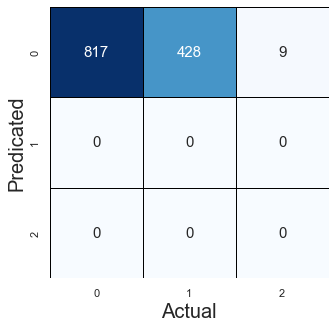

In [50]:
def svm():
    model=SVC(C=10, gamma=0.001, kernel='poly')
    model.fit(x_train,y_train.values.ravel())
    predictions=model.predict(x_test)
    print("accuracy: ",accuracy_score(y_test,grid_predictions,normalize=True)*100,"%")    # Efficiency of the model
    print("\n")
    print(classification_report(y_test,predictions,zero_division=False ))
    cm=confusion_matrix(y_test,predictions)
    cm_df=pd.DataFrame(cm)
    fig,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm_df.T,annot=True,annot_kws={'size':15},cmap='Blues',vmin=0,vmax=700,fmt='.0f',linewidths=1,linecolor='black',cbar=False)
    plt.ylabel("Predicated",fontsize=20)
    plt.xlabel("Actual",fontsize=20)
    plt.show()
    
svm()

5. Random Forest Classifier

In [52]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [54]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [61]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f}'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(x_test, y_test)
base_accuracy = evaluate(base_model, x_test, y_test)

Model Performance
Average Error: 0.1112
Accuracy = 91.70%.


Conclusion,


1.LinearRegression         = 32.90 %

2.Gaussian Naive bayes     = 66.34 %

3.Decision Tree Classifire = 76.07 %

4.SVM                      = 77.31 %

5.Random Forest Regressor  = 91.70 %



so,Random Forest regressor is best Model for this problem by 91.70%